In [407]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd
import missingno as msno

# SK Learn
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score , confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

# Trees Visualization
import pydot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

# Misc
import warnings
from sys import modules
from time import time
from platform import python_version

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# IPython
from IPython.display import Image, display

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

In [408]:
R = 0.167226
trainSize = 0.75
randState = 990

In [409]:
url = 'https://raw.githubusercontent.com/Raanank10/Rain_in_Australia/main/weatherAUS.csv'

data = pd.read_csv(url)
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [410]:
unique_data = data

Handle NaN values:

In [411]:
# num_cols = list(unique_data.select_dtypes(include=np.number).columns)
# cat_cols = list(unique_data.select_dtypes('object').columns)

In [412]:
#data[data['RainToday'].notna() && data['RainTomorrow'].notna()]
print(f'unique_data len = {len(unique_data)}')
unique_data = unique_data[unique_data['RainToday'].notna()]
print(f'unique_data len = {len(unique_data)}')
unique_data = unique_data[unique_data['RainTomorrow'].notna()]
print(f'unique_data len = {len(unique_data)}')

unique_data len = 145460
unique_data len = 142199
unique_data len = 140787


In [413]:
unique_data['RainToday'] =    unique_data.RainToday.apply(lambda x: 1 if x == 'Yes' else 0)
unique_data['RainTomorrow'] = unique_data.RainTomorrow.apply(lambda x: 1 if x == 'Yes' else 0)

In [414]:
#creating Year, Month, Week from Date column...

unique_data['Date'] = pd.to_datetime(unique_data.Date, format='%Y/%m/%d')

unique_data.loc[:,'year']  = unique_data.loc[:,'Date'].dt.year
unique_data.loc[:,'month']  = unique_data.loc[:,'Date'].dt.month
unique_data.loc[:,'week']  = unique_data.loc[:,'Date'].dt.week

In [415]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81093 non-null   float64       
 6   Sunshine       73982 non-null   float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  131682 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   139732 non-null  float64       
 12  WindSpeed3pm   138256 non-null  float64       
 13  Humidity9am    139270 non-null  float64       
 14  Humidity3pm    137286 non-null  float64       
 15  

In [416]:
%%time
unique_data_all_int = unique_data.select_dtypes(include=np.number)

CPU times: user 9.6 ms, sys: 18 µs, total: 9.62 ms
Wall time: 10.6 ms


In [417]:
#unique_data_all_int = unique_data[['RainToday','RainTomorrow','year','month','week']]

In [418]:
unique_data_all_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140319 non-null  float64
 1   MaxTemp        140480 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    81093 non-null   float64
 4   Sunshine       73982 non-null   float64
 5   WindGustSpeed  131682 non-null  float64
 6   WindSpeed9am   139732 non-null  float64
 7   WindSpeed3pm   138256 non-null  float64
 8   Humidity9am    139270 non-null  float64
 9   Humidity3pm    137286 non-null  float64
 10  Pressure9am    127044 non-null  float64
 11  Pressure3pm    127018 non-null  float64
 12  Cloud9am       88162 non-null   float64
 13  Cloud3pm       84693 non-null   float64
 14  Temp9am        140131 non-null  float64
 15  Temp3pm        138163 non-null  float64
 16  RainToday      140787 non-null  int64  
 17  RainTomorrow   140787 non-nul

Check if there are NaN

In [419]:
unique_data_all_int.isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
year                 0
month                0
week                 0
dtype: int64

Handle NaN 

In [420]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy='mean')

unique_data_all_int_impute=pd.DataFrame(imputer.fit_transform(unique_data_all_int))
unique_data_all_int_impute.columns=unique_data_all_int.columns
unique_data_all_int_impute.index=unique_data_all_int.index
#imputer.fit(unique_data_all_int)
#SimpleImputer()
unique_data_all_int_impute.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,week
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0.0,0.0,2008.0,12.0,49.0
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0.0,0.0,2008.0,12.0,49.0
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0.0,0.0,2008.0,12.0,49.0
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0.0,0.0,2008.0,12.0,49.0
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0,2008.0,12.0,49.0


In [421]:
#unique_data_all_int = imputer.transform(unique_data_all_int)
imputer.statistics_

array([1.21848239e+01, 2.32351203e+01, 2.34997407e+00, 5.47251551e+00,
       7.63053986e+00, 3.99705199e+01, 1.39904961e+01, 1.86311408e+01,
       6.88268328e+01, 5.14492883e+01, 1.01765458e+03, 1.01525796e+03,
       4.43116082e+00, 4.49925023e+00, 1.69870664e+01, 2.16931827e+01,
       2.23422617e-01, 2.21618473e-01, 2.01275749e+03, 6.40348186e+00,
       2.61220851e+01])

In [422]:
unique_data_all_int.isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
year                 0
month                0
week                 0
dtype: int64

In [423]:
unique_data_all_int_impute.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
week             0
dtype: int64

Split and Fit

In [424]:
X = unique_data_all_int_impute.drop('RainTomorrow', axis=1)
y = unique_data_all_int_impute.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainSize\
                           , random_state = randState, stratify=unique_data.RainTomorrow)

In [425]:
print('train_df shape :',X_train.shape)
print('X_train shape :',X_test.shape)
print('X_train shape :',y_train.shape)
print('test_df shape :',y_test.shape)

train_df shape : (105590, 20)
X_train shape : (35197, 20)
X_train shape : (105590,)
test_df shape : (35197,)


In [426]:
unique_data_all_int_impute[0:5]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,week
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0.0,0.0,2008.0,12.0,49.0
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0.0,0.0,2008.0,12.0,49.0
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0.0,0.0,2008.0,12.0,49.0
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0.0,0.0,2008.0,12.0,49.0
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0,2008.0,12.0,49.0


Model:

In [427]:
dt_model_1 = DecisionTreeClassifier().fit(X_train, y_train)

In [428]:
def visualize_tree(model, md=5, width=800):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md, label='none')
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=width) 

In [429]:
def print_dot_text(model, md=5):
    """The output of this function can be copied to http://www.webgraphviz.com/"""
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    dot_text = dot_data.getvalue()
    print(dot_text)

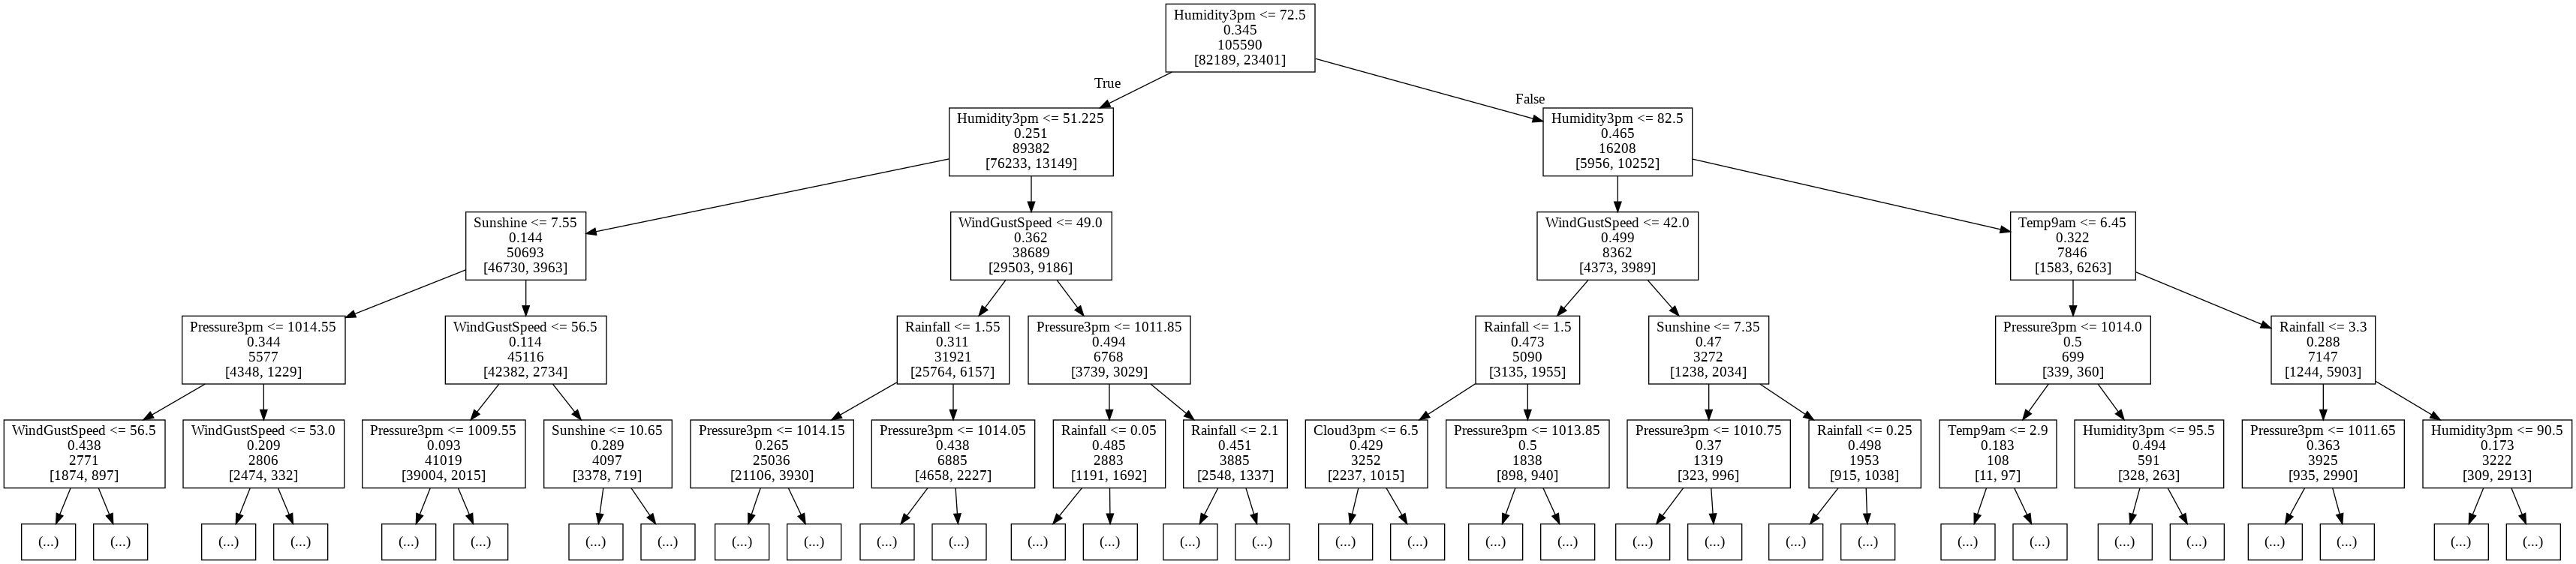

In [430]:
visualize_tree(dt_model_1, md=4, width=1200)

In [431]:
pd.Series(dt_model_1.feature_importances_, index=X_train.columns).sort_values(ascending=False) #.plot.barh(figsize=(4, 10), rot=0, title='Feature Importance')

Humidity3pm      0.276188
Pressure3pm      0.072868
WindGustSpeed    0.069602
Humidity9am      0.049279
MinTemp          0.046539
Pressure9am      0.046501
Rainfall         0.046111
Sunshine         0.045474
MaxTemp          0.044090
Temp9am          0.043804
Temp3pm          0.040145
week             0.039316
WindSpeed3pm     0.034619
WindSpeed9am     0.034242
Evaporation      0.028848
year             0.026965
Cloud3pm         0.022001
Cloud9am         0.018061
month            0.014102
RainToday        0.001244
dtype: float64

In [432]:
dt_model_1.feature_importances_

array([0.04653943, 0.04409016, 0.04611121, 0.02884816, 0.04547363,
       0.06960152, 0.03424196, 0.03461902, 0.04927863, 0.2761883 ,
       0.04650062, 0.07286782, 0.01806116, 0.02200129, 0.04380425,
       0.04014522, 0.00124359, 0.02696543, 0.01410234, 0.03931626])

In [433]:
print('train_df shape :',X_train.shape)

train_df shape : (105590, 20)


In [434]:
X_train_pred = X_train.copy()

X_train_pred['y_pred'] = dt_model_1.predict(X_train)
X_train_pred['y_train'] = y_train
X_train_pred.head(6)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,week,y_pred,y_train
110256,9.6,19.5,1.0,6.000000,10.70000,39.97052,11.0,26.0,57.0,71.0,1021.4,1018.5,1.000000,2.00000,16.3,18.0,0.0,2013.0,10.0,41.0,0.0,0.0
48788,2.5,23.0,0.0,5.472516,7.63054,56.00000,6.0,37.0,65.0,36.0,1018.3,1014.6,4.431161,4.49925,12.9,21.9,0.0,2016.0,11.0,44.0,0.0,0.0
70256,20.3,36.0,0.0,19.000000,9.90000,54.00000,20.0,15.0,52.0,75.0,1009.8,1008.9,5.000000,7.00000,28.7,24.3,0.0,2017.0,2.0,6.0,0.0,0.0
134706,9.8,18.5,2.8,5.472516,7.63054,44.00000,19.0,17.0,66.0,80.0,1000.1,998.3,4.431161,4.49925,18.1,15.9,1.0,2013.0,9.0,40.0,1.0,1.0
22829,17.3,23.6,0.0,5.472516,11.90000,28.00000,15.0,17.0,74.0,62.0,1011.1,1010.2,3.000000,1.00000,21.5,22.3,0.0,2013.0,12.0,49.0,0.0,0.0
55748,2.7,12.4,0.2,5.472516,7.63054,54.00000,28.0,39.0,79.0,62.0,1024.0,1018.9,5.000000,6.00000,7.7,11.3,0.0,2010.0,9.0,36.0,1.0,1.0


In [435]:
print('train_df shape :',X_train.shape)

train_df shape : (105590, 20)


In [436]:
#dt_model_1.fit(X_train,y_train)
preds_1= dt_model_1.predict_proba(X_test)[:,1]

roc_auc_score(y_test,preds_1)

0.7003214721244979

In [437]:
cm = confusion_matrix(y_true=X_train_pred.y_train,y_pred=X_train_pred.y_pred)
pd.DataFrame(cm, index=dt_model_1.classes_, columns=rf_model_1.classes_)

,0.0,1.0
0.0,82189,0
1.0,0,23401


In [438]:
print(classification_report(y_true=X_train_pred.y_train,
                            y_pred=X_train_pred.y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82189
         1.0       1.00      1.00      1.00     23401

    accuracy                           1.00    105590
   macro avg       1.00      1.00      1.00    105590
weighted avg       1.00      1.00      1.00    105590



Random Forest:

In [439]:
print('train_df shape :',X_train.shape)
print('X_train shape :',X_test.shape)
print('X_train shape :',y_train.shape)
print('test_df shape :',y_test.shape)

train_df shape : (105590, 20)
X_train shape : (35197, 20)
X_train shape : (105590,)
test_df shape : (35197,)


In [440]:
rf_model_1 = RandomForestClassifier()

rf_model_1.fit(X_train,y_train)
preds= rf_model_1.predict_proba(X_test)[:,1]

roc_auc_score(y_test,preds)

0.8894695587108077

Validatine the model:

In [441]:
pd.Series(rf_model_1.feature_importances_, index=X_train.columns).sort_values(ascending=False)#.plot.barh(figsize=(4, 10), rot=0, title='Feature Importance')

Humidity3pm      0.182654
Pressure3pm      0.065935
WindGustSpeed    0.057437
Pressure9am      0.056555
Humidity9am      0.056228
Rainfall         0.055411
Sunshine         0.053820
Temp3pm          0.049860
MinTemp          0.049703
MaxTemp          0.048597
Temp9am          0.047249
week             0.038335
Cloud3pm         0.036589
WindSpeed3pm     0.036376
WindSpeed9am     0.033918
RainToday        0.029211
Evaporation      0.027874
year             0.027676
Cloud9am         0.024384
month            0.022189
dtype: float64

In [442]:
y_train_pred = pd.DataFrame(rf_model_1.predict_proba(X_train), 
                            columns=rf_model_1.classes_)
y_train_pred.head()

,0.0,1.0
0,0.96,0.04
1,0.95,0.05
2,0.84,0.16
3,0.06,0.94
4,0.95,0.05


In [443]:
X_train_pred_2 = X_train.copy()

X_train_pred_2['y_pred'] = rf_model_1.predict(X_train)
X_train_pred_2['y_train'] = y_train
X_train_pred_2.head(6)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,week,y_pred,y_train
110256,9.6,19.5,1.0,6.000000,10.70000,39.97052,11.0,26.0,57.0,71.0,1021.4,1018.5,1.000000,2.00000,16.3,18.0,0.0,2013.0,10.0,41.0,0.0,0.0
48788,2.5,23.0,0.0,5.472516,7.63054,56.00000,6.0,37.0,65.0,36.0,1018.3,1014.6,4.431161,4.49925,12.9,21.9,0.0,2016.0,11.0,44.0,0.0,0.0
70256,20.3,36.0,0.0,19.000000,9.90000,54.00000,20.0,15.0,52.0,75.0,1009.8,1008.9,5.000000,7.00000,28.7,24.3,0.0,2017.0,2.0,6.0,0.0,0.0
134706,9.8,18.5,2.8,5.472516,7.63054,44.00000,19.0,17.0,66.0,80.0,1000.1,998.3,4.431161,4.49925,18.1,15.9,1.0,2013.0,9.0,40.0,1.0,1.0
22829,17.3,23.6,0.0,5.472516,11.90000,28.00000,15.0,17.0,74.0,62.0,1011.1,1010.2,3.000000,1.00000,21.5,22.3,0.0,2013.0,12.0,49.0,0.0,0.0
55748,2.7,12.4,0.2,5.472516,7.63054,54.00000,28.0,39.0,79.0,62.0,1024.0,1018.9,5.000000,6.00000,7.7,11.3,0.0,2010.0,9.0,36.0,1.0,1.0


In [444]:
cm = confusion_matrix(y_true=X_train_pred.y_train,y_pred=X_train_pred.y_pred)
pd.DataFrame(cm, index=rf_model_1.classes_, columns=rf_model_1.classes_)

,0.0,1.0
0.0,82189,0
1.0,0,23401


In [445]:
print(classification_report(y_true=X_train_pred.y_train,
                            y_pred=X_train_pred.y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82189
         1.0       1.00      1.00      1.00     23401

    accuracy                           1.00    105590
   macro avg       1.00      1.00      1.00    105590
weighted avg       1.00      1.00      1.00    105590

